# BeamNGpy Feature Overview
*BeamNG.tech only*

## Introduction
This notebook is a non-exhaustive showcase of the things you can do with BeamNGpy, focused on customization of the vehicles, the environment and the sensor suite.

To install BeamNGpy, follow the instructions listed [here](https://github.com/BeamNG/BeamNGpy#installation).
Also be sure to study the complete documentation of [BeamNGpy](https://beamngpy.readthedocs.io) and [BeamNG.tech](https://documentation.beamng.com/beamng_tech/), if you want to familiarize yourself more with the library.

Let's start!

BeamNGpy is packaged as a Python module called `beamngpy`. All the imports that we will need in this notebook are listed in the following cell:

In [1]:
import colorsys
import time

import matplotlib.pyplot as plt
import numpy as np
from beamngpy import BeamNGpy, Scenario, Vehicle
from beamngpy.sensors import (
    IMU, Camera, Damage, Electrics, Lidar, State, Timer, Ultrasonic)
from IPython.display import clear_output

To start BeamNG.tech using BeamNGpy, you use the constructor of the class `BeamNGpy`. The `BeamNGpy` instance allows you to control the simulation. We call `BeamNGpy.open()` to start the simulation which is connected to the Python process using a TCP socket.

#### Documentation

In [2]:
?BeamNGpy

Init signature:
BeamNGpy(
    host: 'str',
    port: 'int',
    home: 'str | None' = None,
    binary: 'str | None' = None,
    user: 'str | None' = None,
    remote: 'bool | None' = None,
    quit_on_close: 'bool' = True,
    crash_lua_on_error: 'bool | None' = None,
)
Docstring:     
The :class:`BeamNGpy` class is the backbone of communication with the BeamNG
simulation and offers methods of starting, stopping, connecting to, and
controlling the state of the simulator.

Instantiates a BeamNGpy instance connecting to the simulator on the
given host and port. The home directory of the simulator can be passed
to this constructor. If ``None`` is given, this class tries to read a
home path from the ``BNG_HOME`` environment variable.

Args:
    host: The host to connect to.
    port: The port to connect to.
    home: Path to the simulator's home directory.
    binary: Optional custom path to the binary, relative to the simulator's
            home directory. Default is ``Bin64/BeamNG.{tech

In [3]:
?BeamNGpy.open

Signature:
BeamNGpy.open(
    self,
    extensions: 'List[str] | None' = None,
    *args: 'str',
    launch: 'bool' = True,
    crash_lua_on_error: 'bool | None' = None,
    **opts: 'str',
) -> 'BeamNGpy'
Docstring:
Starts a BeamNG.* process, opens a server socket, and waits for the spawned BeamNG.* process to connect.
This method blocks until the process started and is ready.

Args:
    extensions: A list of non-default BeamNG Lua extensions to be loaded on start.
    launch: Whether to launch a new process or connect to a running one on the configured host/port.
            Defaults to True.
    crash_lua_on_error: If True, then sets BeamNG to not respond to BeamNGpy requests when a Lua error
                        happens and prints the stacktrace instead.
                        Is applicable only when the process is launched by this instance of BeamNGpy,
                        as it sets a launch argument of the process. Defaults to False.
File:      c:\dev\beamngpy\src\beamngpy

#### Code

In [4]:
beamng = BeamNGpy('localhost', 64256)
beamng.open()

The main menu of BeamNG.tech pops up and we are ready to set up the simulation! We will start on the `italy` map. Let's generate a `Scenario` object, a single `Vehicle` and add the vehicle to the scenario.

#### Documentation

In [5]:
?Scenario

Init signature:
Scenario(
    level: 'str | Level',
    name: 'str',
    path: 'str | None' = None,
    human_name: 'str | None' = None,
    description: 'str | None' = None,
    difficulty: 'int' = 0,
    authors: 'str' = 'BeamNGpy',
    **options: 'Any',
)
Docstring:     
The scenario class contains information for setting up and executing
simulation scenarios along with methods to extract data during their
execution.

Instantiates a scenario instance with the given name taking place in
the given level.

Args:
    level: Either the name of the level this scenario takes place in
            as a string or as an instance of :class:`.Level`
    name: The name of this scenario. Should be unique for the
                level it's taking place in to avoid file collisions.
    path: The path to an already existing scenario file (relative to
          the home folder / user folder). If set, then :func:`Scenario.make`
          should not be called, as the scenario is already made.
    human_

In [6]:
?Vehicle

Init signature:
Vehicle(
    vid: 'str',
    model: 'str',
    port: 'int | None' = None,
    license: 'str | None' = None,
    color: 'Color | None' = None,
    color2: 'Color | None' = None,
    color3: 'Color | None' = None,
    extensions: 'List[str] | None' = None,
    part_config: 'str | None' = None,
    **options: 'Any',
)
Docstring:     
The vehicle class represents a vehicle of the simulation that can be
interacted with from BeamNGpy. This class offers methods to both control
the vehicle's state as well as retrieve information about it through
sensors the user can attach to the vehicle.

Creates a vehicle with the given vehicle ID. The ID must be unique
within the scenario.

Args:
    vid: The vehicle's ID.
    model: Model of the vehicle.
    port: The TCP port on which the vehicle should connect. If None, a
          new port is requested from the simulator.
    license: The license plate's text.
    color: The primary vehicle color.
    color2: The secondary vehicle color.

In [7]:
?Scenario.add_vehicle

Signature:
Scenario.add_vehicle(
    self,
    vehicle: 'Vehicle',
    pos: 'Float3' = (0, 0, 0),
    rot_quat: 'Quat' = (0, 0, 0, 1),
    cling: 'bool' = True,
) -> 'None'
Docstring:
Adds a :class:`.Vehicle`: to this scenario at the given position with the given
orientation.

Args:
    vehicle: The vehicle to spawn.
    pos: ``(x, y, z)`` tuple specifying the position of the vehicle.
    rot_quat: ``(x, y, z, w)`` tuple specifying the rotation as quaternion.
    cling: If True, the z-coordinate of the vehicle's position will be set to the ground level at the given
           position to avoid spawning the vehicle below ground or in the air.
File:      c:\dev\beamngpy\src\beamngpy\scenario\scenario.py
Type:      function

In [8]:
?Scenario.make

Signature: Scenario.make(self, bng: 'BeamNGpy') -> 'None'
Docstring:
Generates necessary files to describe the scenario in the simulation
and outputs them to the simulator.

Args:
    bng: The BeamNGpy instance to generate the scenario for.

Raises:
    BNGError: If the scenario already has set its info .json file included.
File:      c:\dev\beamngpy\src\beamngpy\scenario\scenario.py
Type:      function

#### Code

In [9]:
scenario = Scenario('italy', 'beamngpy_feature_overview')

ego = Vehicle('ego', model='etk800', color='White', license='PYTHON')
scenario.add_vehicle(ego, pos=(245.11, -906.94, 247.46),
                     rot_quat=(0.0010, 0.1242, 0.9884, -0.0872))
scenario.make(beamng)

Voilà, simple as that! To actually start the simulation, you need the following commands:

#### Documentation

In [10]:
?beamng.scenario.load

Signature:
beamng.scenario.load(
    scenario: 'Scenario',
    precompile_shaders: 'bool' = True,
    connect_player_vehicle: 'bool' = True,
    connect_existing_vehicles: 'bool' = True,
) -> 'None'
Docstring:
Loads the given scenario in the simulation and returns once loading
is finished.

Args:
    scenario: The scenario to load.
    precompile_shaders: Whether the shaders should be compiled before the start of the scenario.
                        If False, the first load of a map will take a longer time, but disabling
                        the precompilation can lead to issues with the :class:`Camera` sensor.
                        Defaults to True.
    connect_player_vehicle: Whether the player vehicle should be connected
                            to this (:class:``.Scenario``) instance. Defaults to True.
    connect_existing_vehicles: Whether ALL vehicles spawned already in the scenario should be connected
                               to this (:class:``.Scenario``) instanc

In [11]:
?beamng.scenario.start

Signature: beamng.scenario.start(restrict_actions: 'bool' = False) -> 'None'
Docstring:
Starts the scenario; equivalent to clicking the "Start" button in the
game after loading a scenario. This method blocks until the countdown
to the scenario's start has finished.

Args:
    restrict_actions: Whether to keep scenario restrictions,
                    such as limited menu options and controls.
                    Defaults to False.
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\scenario.py
Type:      method

#### Code

In [12]:
beamng.scenario.load(scenario)
beamng.scenario.start()

The scenario is now loaded and started. Get ready for the feature showcase! We start by using the `ai.set_mode` command on the vehicle. It will drive around through the whole map, using the road network data to navigate.

#### Documentation

In [13]:
?ego.ai.set_mode

Signature: ego.ai.set_mode(mode: 'str') -> 'None'
Docstring:
Sets the desired mode of the simulator's built-in AI for this vehicle.
Possible values are:

 * ``disabled``: Turn the AI off (default state)
 * ``random``: Drive from random points to random points on the map
 * ``span``: Drive along the entire road network of the map
 * ``manual``: Drive to a specific waypoint, target set separately
 * ``chase``: Chase a target vehicle, target set separately
 * ``flee``: Flee from a vehicle, target set separately
 * ``stopping``: Make the vehicle come to a halt (AI disables itself once the vehicle stopped.)

Note:
    Some AI methods automatically set appropriate modes, meaning a call
    to this method might be optional.

Args:
    mode: The AI mode to set.
File:      c:\dev\beamngpy\src\beamngpy\api\vehicle\ai.py
Type:      method

In [14]:
?ego.ai.drive_in_lane

Signature: ego.ai.drive_in_lane(lane: 'bool') -> 'None'
Docstring:
Sets the drive in lane flag of the AI. If True, the AI only drives
within the lane it can legally drive in.

Args:
    lane: Lane flag to set.
File:      c:\dev\beamngpy\src\beamngpy\api\vehicle\ai.py
Type:      method

#### Code

In [15]:
ego.ai.set_mode('span')
ego.ai.drive_in_lane(True)

## Customization options

With BeamNGpy, we can set and tweak various parameters of the vehicles spawned and also of the whole simulation environment. Let's see a few examples of what is possible to do. This list is not exhaustive; consult the [documentation](https://beamngpy.readthedocs.io) to see all the available options.

#### Documentation

In [16]:
?ego.set_color

Signature: ego.set_color(rgba: 'Color' = (1.0, 1.0, 1.0, 1.0)) -> 'None'
Docstring:
Sets the color of this vehicle. Colour can be adjusted on the RGB
spectrum and the "shininess" of the paint.

Args:
    rgba: The new colour given as a tuple of RGBA floats, where
          the alpha channel encodes the shininess of the paint.
          Also can be given in any format specified in :class:`~beamngpy.types.Color`.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

In [17]:
?ego.set_lights

Signature:
ego.set_lights(
    left_signal: 'bool | None' = None,
    right_signal: 'bool | None' = None,
    hazard_signal: 'bool | None' = None,
    headlights: 'int | None' = None,
    fog_lights: 'int | None' = None,
    lightbar: 'int | None' = None,
) -> 'None'
Docstring:
Sets the vehicle's lights to given intensity values. The lighting
system features lights that are simply binary on/off, but also ones
where the intensity can be varied. Binary lights include:

    * ``left_signal``
    * ``right_signal``
    * ``hazard_signal``

Non-binary lights vary between 0 for off, 1 for on, 2 for higher
intensity. For example, headlights can be turned on with 1 and set to
be more intense with 2. Non-binary lights include:

    * ``headlights``
    * ``fog_lights``
    * ``lightbar``

Args:
    left_signal: On/off state of the left signal
    right_signal: On/off state of the right signal
    hazard_signal: On/off state of the hazard lights
    headlights: Value from 0 to 2 indicating headl

In [18]:
?ego.set_license_plate

Signature: ego.set_license_plate(text: 'str') -> 'None'
Docstring:
Sets the text of the vehicle's license plate.

Args:
    text: The vehicle plate text to be set.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

In [19]:
?beamng.env.set_tod

Signature:
beamng.env.set_tod(
    tod: 'Time | None' = None,
    play: 'bool | None' = None,
    day_scale: 'float | None' = None,
    night_scale: 'float | None' = None,
    day_length: 'float | None' = None,
    azimuth_override: 'float | None' = None,
) -> 'None'
Docstring:
Sets the current time of day. The time of day value is given as a float
between 0 and 1. How this value affects the lighting of the scene is
dependant on the map's TimeOfDay object.

Args (TODO better docs):
    tod: Time of day. Can be provided as a float between 0.0 and 1.0, or as a string in the format 'HH:MM:SS'.
    play: False by default.
    day_scale: How fast should the day be.
    night_scale: How fast should the night be.
    day_length: Length of the day (24 hours).
    azimuth_override: TODO
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\environment.py
Type:      method

In [20]:
?beamng.control.pause

Signature: beamng.control.pause() -> 'None'
Docstring:
Sends a pause request to BeamNG.*, blocking until the simulation is
paused.
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\control.py
Type:      method

In [21]:
?beamng.control.resume

Signature: beamng.control.resume() -> 'None'
Docstring:
Sends a resume request to BeamNG.*, blocking until the simulation
is resumed.
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\control.py
Type:      method

In [22]:
?beamng.env.set_gravity

Signature: beamng.env.set_gravity(gravity: 'float' = -9.807) -> 'None'
Docstring:
Sets the strength of gravity in the simulator.

Args:
    gravity: The gravity value to set. The default one is that of earth (-9.807).
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\environment.py
Type:      method

In [23]:
?beamng.ui.display_message

Signature: beamng.ui.display_message(msg: 'str') -> 'None'
Docstring:
Displays a toast message in the user interface of the simulator.

Args:
    msg: The message to display.
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\ui.py
Type:      method

### Change color

Cycles through 30 different colors and applies them to the vehicle in sequence.

In [24]:
def generate_colors(n):
    hue = 0.0
    step_val = 1.0 / n
    for _ in range(n):
        rgb = colorsys.hsv_to_rgb(hue, 1, 1)
        hue += step_val
        hue %= 1.0
        yield (*rgb, 1.0)

for color in generate_colors(30):
    ego.set_color(color)
    time.sleep(0.1)
ego.set_color((1.0, 0.5, 0.5, 1.0))

### Change license plate

In [25]:
ego.set_license_plate('ILOVEBNG')

### Switch lights

Switches all lights on and then resets them to the original state.

In [26]:
ego.set_lights(left_signal=True, right_signal=True, hazard_signal=True,
               headlights=2, fog_lights=2, lightbar=2)

In [27]:
ego.set_lights(left_signal=False, right_signal=False, hazard_signal=False,
               headlights=1, fog_lights=0, lightbar=0)

### Set time of day

In [28]:
for t in range(100):
    beamng.env.set_tod(t / 100)
    time.sleep(0.1)

### Pause/resume simulation

In [29]:
beamng.control.pause()

In [30]:
beamng.control.resume()

### Set gravity

In [31]:
beamng.env.set_gravity(0)
beamng.ui.display_message('Space adventures await!')

In [32]:
beamng.env.set_gravity(-50)

OK, that was too much gravity for the car. Let's reset it back. We will use the `ego.teleport` function, which resets the vehicle's physics state (repairs it) as a side effect.

### Teleport vehicle

#### Documentation

In [33]:
?Scenario.find_waypoints

Signature: Scenario.find_waypoints(self) -> 'List[ScenarioObject]'
Docstring:
Finds waypoints placed in the world right now.

Returns:
    A list of :class:`.ScenarioObject` containing waypoints found in
    the world.

Raises:
    BNGError: If the scenario is not currently loaded.
File:      c:\dev\beamngpy\src\beamngpy\scenario\scenario.py
Type:      function

In [34]:
?ego.teleport

Signature:
ego.teleport(
    pos: 'Float3',
    rot_quat: 'Quat | None' = None,
    reset: 'bool' = True,
) -> 'bool'
Docstring:
Teleports the vehicle to the given position with the given
rotation.

Args:
    pos: The target position as an (x,y,z) tuple containing world-space coordinates.
    rot_quat: Optional tuple (x, y, z, w) specifying vehicle rotation as quaternion
    reset: Specifies if the vehicle will be reset to its initial state during teleport (including its velocity).

Notes:
    The ``reset=False`` option is incompatible with setting rotation of
    the vehicle. With the current implementation, it is not possible to
    set the rotation of the vehicle and to keep its velocity during teleport.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

In [35]:
?ego.set_shift_mode

Signature: ego.set_shift_mode(mode: 'str') -> 'None'
Docstring:
Sets the shifting mode of the vehicle. This changes whether or not and
how the vehicle shifts gears depending on the RPM. Available modes are:

 * ``realistic_manual``
    Gears have to be shifted manually by the user, including engaging the clutch.
 * ``realistic_manual_auto_clutch``
    Gears have to be shifted manually by the user, without having to use the clutch.
 * ``arcade``
    Gears shift up and down automatically. If the brake is held, the vehicle automatically
    shifts into reverse and accelerates backward until brake is released or throttle is engaged.
 * ``realistic_automatic``
    Gears shift up automatically, but reverse and parking need to be shifted to manually.

Args:
    mode: The mode to set. Must be a string from the options listed above.

Raises:
    BNGValueError: If an invalid mode is given.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

In [36]:
?ego.control

Signature:
ego.control(
    steering: 'float | None' = None,
    throttle: 'float | None' = None,
    brake: 'float | None' = None,
    parkingbrake: 'float | None' = None,
    clutch: 'float | None' = None,
    gear: 'int | None' = None,
) -> 'None'
Docstring:
Sends a control message to the vehicle, setting vehicle inputs
accordingly.

Args:
    steering: Rotation of the steering wheel, from -1.0 to 1.0.
    throttle: Intensity of the throttle, from 0.0 to 1.0.
    brake: Intensity of the brake, from 0.0 to 1.0.
    parkingbrake: Intensity of the parkingbrake, from 0.0 to 1.0.
    clutch: Clutch level, from 0.0 to 1.0.
    gear: Gear to shift to, -1 eq backwards, 0 eq neutral, 1 to X eq nth gear
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

In [37]:
?ego.set_velocity

Signature: ego.set_velocity(velocity: 'float', dt: 'float' = 1.0) -> 'None'
Docstring:
Sets the velocity of this vehicle. The velocity is not achieved instantly,
it is acquired gradually over the time interval set by the `dt` argument.

As the method of setting velocity uses physical forces, at high velocities
it is important to set ``dt`` to an appropriately high value. The default
``dt`` value of 1.0 is suitable for velocities up to 30 m/s.

Args:
    velocity: The target velocity in m/s.
    dt: The time interval over which the vehicle reaches the target velocity.
        Defaults to 1.0.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

#### Code

In [38]:
# reset gravity, disable AI
beamng.env.set_gravity()
ego.ai.set_mode('disabled')

In [39]:
waypoints = scenario.find_waypoints() # get a list of locations from the simulation
waypoints = {w.name: w for w in waypoints}

ego.teleport(waypoints['city_east_bridge1_b'].pos, rot_quat=(0.0011, 0.0315, 0.9995, -0.0096))

True

If we need to teleport a moving vehicle to some position and keep it moving, we set the `reset` argument of `Vehicle.teleport` to `False`.

In [40]:
# get the vehicle moving
ego.set_shift_mode('arcade')
ego.control(throttle=0.1)
ego.set_velocity(10)
ego.sensors.poll()

# wait some time
time.sleep(2.0)

# teleport the vehicle and enable AI again
ego.teleport((244.87, -926.57, 251.89), ego.state['rotation'], reset=False)
ego.ai.set_mode('span')
ego.ai.drive_in_lane(True)

## Traffic

To enable traffic, we use the `traffic.spawn` function. With the traffic, we are no longer alone in this simulation!

#### Documentation

In [41]:
?beamng.traffic.spawn

Signature:
beamng.traffic.spawn(
    max_amount: 'int | None' = None,
    police_ratio: 'float' = 0,
    extra_amount: 'int | None' = None,
    parked_amount: 'int | None' = None,
) -> 'None'
Docstring:
Enables traffic simulation with freshly spawned vehicles.

Args:
    max_amount: The maximum allowed vehicles to spawn. If None, defaults to in-game settings.
    police_ratio: A number between 0.0 and 1.0 indicating the ratio of police vehicles in the traffic.
    extra_amount: The maximum amount of inactive vehicles to spawn and swap in and out of the traffic system.
                  If None, defaults to in-game settings.
    parked_amount: The maximum amount of parked vehicles to spawn. If None, defaults to in-game settings.
File:      c:\dev\beamngpy\src\beamngpy\api\beamng\traffic.py
Type:      method

In [42]:
?ego.switch

Signature: ego.switch() -> 'None'
Docstring:
Switches the simulator to this vehicle. This means that the simulator's main camera,
inputs by the user, and so on will all focus on this vehicle from now on.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\vehicle.py
Type:      method

#### Code

In [43]:
beamng.traffic.spawn(max_amount=10)
time.sleep(15)
ego.teleport((-696.25, -1330.46, 140.48), rot_quat=(0.0000, 0.0000, 0.8567, -0.5154))
ego.switch()

## Sensors

Vehicles can be provided with sensors, which capture the simulation and vehicle state data.
There are currently two classes of sensor, which have slightly different APIs.

The first class of sensors are our `Automated Sensors`. These sensors are created with parameters to allow them to update automatically in the simulator at a given time, and with a given priority.  This management is needed when we wish to run the simulation with many sensors.  These sensors (with the exception of the accelerometer) can be attached to fixed points on the map, as well as to positions on or relative to vehicles.
These sensors can also be set to not update automatically, if desired.  We can poll these sensors in two ways: i) by getting the latest readings which were polled at the set update time for the sensor, or ii) by sending ad-hoc requests for data, which can be used if we only want occasional reading on-the-fly.
- Camera (providing colour images, class annotation images, semantic annotation images, and depth images)
- LiDAR (providing point cloud and/or annotation colour data)
- Ultrasonic Sensor (eg can be used as a parking sensor)
- Accelerometer (a tri-axial accelerometer, providing a vehicles acceleration in a local coordinate system)

The second class of sensors are not automated currently, and use the older API.  These are polled in an ad-hoc fashion.
- IMU (Inertial Measurement Unit)
- Electrics
- Vehicle state

Let's see how we can use these sensors in BeamNGpy. We respawn our vehicle with multiple sensors and get data from them.

#### Documentation

In [44]:
?ego.sensors.attach

Signature: ego.sensors.attach(name: 'str', sensor: 'Sensor') -> 'None'
Docstring:
Enters a sensor into this vehicle's map of known sensors and calls the
attach-hook of said sensor. The sensor is identified using the given
name, which has to be unique among the other sensors of the vehicle.

Args:
    name: The name of the sensor.
    sensor: The sensor to attach to the vehicle.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\sensors.py
Type:      method

In [45]:
?ego.sensors.poll

Signature: ego.sensors.poll(*sensor_names: 'str') -> 'None'
Docstring:
Updates the vehicle's sensor readings.

Args:
    sensor_names: Names of sensors to poll. If none are provided, then all attached sensors
                  are polled.

Returns:
    Nothing. Use ``vehicle.sensors[<sensor_id>][<data_access_id>]`` to
    access the polled sensor data.
File:      c:\dev\beamngpy\src\beamngpy\vehicle\sensors.py
Type:      method

#### Code

### Camera sensor

Camera sensor provides visual information about the environment. Colour camera provides the same visuals as the simulation. Annotation camera provides object annotations - every object class is annotated with a different color. Instance camera provides instance annotation - every object instance is annotated with a different color. And the depth camera provides depth information of the environment.

#### Documentation

In [46]:
?Camera

Init signature:
Camera(
    name: 'str',
    bng: 'BeamNGpy',
    vehicle: 'Vehicle | None' = None,
    requested_update_time: 'float' = 0.1,
    update_priority: 'float' = 0.0,
    pos: 'Float3' = (0, 0, 3),
    dir: 'Float3' = (0, -1, 0),
    up: 'Float3' = (0, 0, 1),
    resolution: 'Int2' = (512, 512),
    field_of_view_y: 'float' = 70,
    near_far_planes: 'Float2' = (0.05, 100.0),
    is_using_shared_memory: 'bool' = False,
    is_render_colours: 'bool' = True,
    is_render_annotations: 'bool' = True,
    is_render_instance: 'bool' = False,
    is_render_depth: 'bool' = True,
    is_depth_inverted: 'bool' = False,
    is_visualised: 'bool' = False,
    is_static: 'bool' = False,
    is_snapping_desired: 'bool' = False,
    is_force_inside_triangle: 'bool' = False,
)
Docstring:     
An interactive, automated camera sensor, which can produce regular colour images, depth images, or annotation images.
This sensor can be attached to a vehicle, or can be fixed to a position in space. 

In [47]:
?Camera.poll

Signature: Camera.poll(self) -> 'StrDict'
Docstring:
Gets the most-recent readings for this sensor.
Note: if this sensor was created with a negative update rate, then there may have been no readings taken.

Returns:
    The processed images.
File:      c:\dev\beamngpy\src\beamngpy\sensors\camera\camera.py
Type:      function

In [48]:
?Camera.get_full_poll_request

Signature: Camera.get_full_poll_request(self) -> 'StrDict'
Docstring:
Gets a full camera request (semantic annotation and instance annotation data included).
NOTE: this function blocks the simulation until the data request is completed.

Returns:
    The camera data, as images
File:      c:\dev\beamngpy\src\beamngpy\sensors\camera\camera.py
Type:      function

#### Code

In [49]:
camera = Camera('camera1', beamng, ego, is_render_instance=True,
                is_render_annotations=True, is_render_depth=True)
time.sleep(2)
data = camera.poll()
data

{'type': 'Camera',
 'colour': <PIL.Image.Image image mode=RGBA size=512x512>,
 'annotation': <PIL.Image.Image image mode=RGBA size=512x512>,
 'instance': None,
 'depth': <PIL.Image.Image image mode=F size=512x512>}

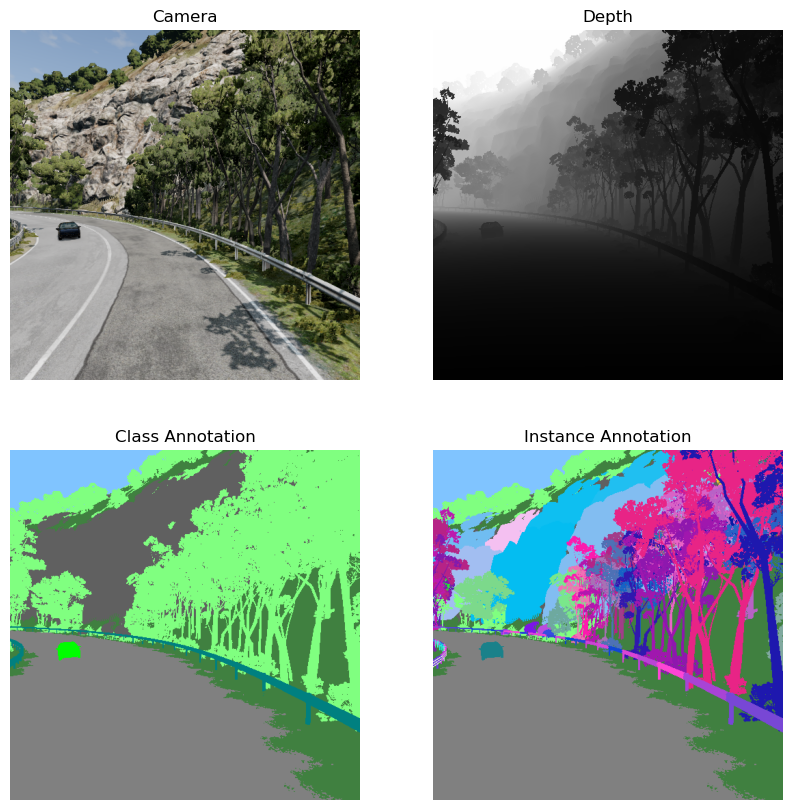

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]
ax[0, 0].title.set_text('Camera')
ax[0, 1].title.set_text('Depth')
ax[1, 0].title.set_text('Class Annotation')
ax[1, 1].title.set_text('Instance Annotation')

for _ in range(10):
    data = camera.get_full_poll_request()
    ax[0, 0].imshow(np.asarray(data['colour'].convert('RGB')))
    ax[0, 1].imshow(np.asarray(data['depth'].convert('RGB')))
    ax[1, 0].imshow(np.asarray(data['annotation'].convert('RGB')))
    ax[1, 1].imshow(np.asarray(data['instance'].convert('RGB')))
    display(fig)
    clear_output(wait=True)
    
camera.remove()

### LiDAR

Another sensor provided by the simulation is LiDAR. The LiDAR sensor provides 3D point clouds representing the environment as detected by a pulsing laser emitted from the vehicle.

#### Documentation

In [51]:
?Lidar

Init signature:
Lidar(
    name: 'str',
    bng: 'BeamNGpy',
    vehicle: 'Vehicle | None' = None,
    requested_update_time: 'float' = 0.1,
    update_priority: 'float' = 0.0,
    pos: 'Float3' = (0, 0, 1.7),
    dir: 'Float3' = (0, -1, 0),
    up: 'Float3' = (0, 0, 1),
    vertical_resolution: 'int' = 64,
    vertical_angle: 'float' = 26.9,
    rays_per_second: 'float' = 2200000,
    frequency: 'float' = 20,
    horizontal_angle: 'float' = 360,
    max_distance: 'float' = 120,
    is_using_shared_memory: 'bool' = True,
    is_visualised: 'bool' = True,
    is_annotated: 'bool' = False,
    is_static: 'bool' = False,
    is_snapping_desired: 'bool' = False,
    is_force_inside_triangle: 'bool' = False,
)
Docstring:     
An interactive, automated LiDAR sensor, which produces regular LiDAR point clouds, ready for further processing.
This sensor can be attached to a vehicle, or can be fixed to a position in space. The dir and up parameters are used to set the local coordinate system.
A r

In [52]:
?Lidar.poll

Signature: Lidar.poll(self) -> 'StrDict'
Docstring:
Gets the most-recent readings for this sensor.
Note: if this sensor was created with a negative update rate, then there may have been no readings taken.

Returns:
    The LiDAR point cloud and colour data.
File:      c:\dev\beamngpy\src\beamngpy\sensors\lidar\lidar.py
Type:      function

#### Code

In [53]:
lidar = Lidar('lidar1', beamng, ego)
time.sleep(2)
lidar_data = lidar.poll()
print(lidar_data)

{'type': 'Lidar', 'pointCloud': array([ -838.46436, -1430.7308 ,   142.7699 , ...,     0.     ,
           0.     ,     0.     ], dtype=float32), 'colours': array([255,  68,   0, ...,   0,   0,   0], dtype=uint8)}


In [54]:
lidar.remove()

### Ultrasonic sensor

An ultrasonic sensor measures the distance to a close object using ultrasonic waves and uses the echo-localization principle (for example, a parking sensor).

#### Documentation

In [55]:
?Ultrasonic

Init signature:
Ultrasonic(
    name: 'str',
    bng: 'BeamNGpy',
    vehicle: 'Vehicle | None' = None,
    requested_update_time: 'float' = 0.1,
    update_priority: 'float' = 0.0,
    pos: 'Float3' = (0, 0, 1.7),
    dir: 'Float3' = (0, -1, 0),
    up: 'Float3' = (0, 0, 1),
    resolution: 'Int2' = (200, 200),
    field_of_view_y: 'float' = 5.7,
    near_far_planes: 'Float2' = (0.1, 5.1),
    range_roundess: 'float' = -1.15,
    range_cutoff_sensitivity: 'float' = 0.0,
    range_shape: 'float' = 0.3,
    range_focus: 'float' = 0.376,
    range_min_cutoff: 'float' = 0.1,
    range_direct_max_cutoff: 'float' = 5.0,
    sensitivity: 'float' = 3.0,
    fixed_window_size: 'float' = 10,
    is_visualised: 'bool' = True,
    is_static: 'bool' = False,
    is_snapping_desired: 'bool' = False,
    is_force_inside_triangle: 'bool' = False,
)
Docstring:     
An interactive, automated ultrasonic sensor, which produces regular distance measurements, ready for further processing.
This sensor can b

In [56]:
?Ultrasonic.poll

Signature: Ultrasonic.poll(self) -> 'StrDict'
Docstring:
Gets the most-recent readings for this sensor.
Note: if this sensor was created with a negative update rate, then there may have been no readings taken.

Returns:
    A dictionary containing the distance measurement and the window (min and mix values) in which it was computed.
File:      c:\dev\beamngpy\src\beamngpy\sensors\ultrasonic.py
Type:      function

#### Code

In [57]:
ultrasonic = Ultrasonic('ultrasonic1', beamng, ego)

ego.ai.set_mode('disabled')
ego.teleport(pos=(464.23, 1504.52, 139.23), rot_quat=(0, 0, 0, 1), reset=True)
ego.set_shift_mode('arcade')
ego.control(throttle=0.1)
 
for _ in range(20):
    ultrasonic_data = ultrasonic.poll()
    print('Distance to obstacle:', ultrasonic_data['distance'])
    beamng.step(30)

Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 4.524653911590576
Distance to obstacle: 2.427487373352051
Distance to obstacle: 2.614866018295288
Distance to obstacle: 2.05175518989563
Distance to obstacle: 2.20812726020813
Distance to obstacle: 2.155027151107788
Distance to obstacle: 2.13732647895813
Distance to obstacle: 2.13256573677063
Distance to obstacle: 2.135984182357788


In [58]:
ultrasonic.remove()

### Other sensors

These provide differents kinds of measurements of the vehicle and simulation state:
- `State`: position, direction and velocity of the vehicle
- `IMU`: inertial measurement unit, measures forces and rotational acceleration in the vehicle
- `Electrics`: various values provided by the car's electric systems
- `Damage`: provided exact data about damage of the vehicle parts in the simulation
- `Timer`: provides the relative time since the start of the simulation

#### Documentation

In [59]:
?State

Init signature: State()
Docstring:     
The state sensor monitors general stats of the vehicle, such as position,
direction, velocity, etc.

It contains the following:
    * ``pos``: The vehicle's position as an ``(x, y, z)`` triplet
    * ``dir``: The vehicle's direction vector as an ``(x, y, z)`` triplet
    * ``up``: The vehicle's up vector as an ``(x, y, z)`` triplet
    * ``vel``: The vehicle's velocity along each axis in metres per second as an ``(x, y, z)`` triplet
    * ``rotation``: The vehicle's rotation as an ``(x, y, z, w)`` quaternion
File:           c:\dev\beamngpy\src\beamngpy\sensors\state.py
Type:           type
Subclasses:     

In [60]:
?IMU

Init signature:
IMU(
    pos: 'Float3 | None' = None,
    node: 'int | None' = None,
    name: 'str | None' = None,
    debug: 'bool' = False,
)
Docstring:     
An IMU measures forces and rotational acceleration at a certain point on a
vehicle. This can be used to analyze forces acting on certain areas of the
car (like the driver's position) or estimate the trajectory of a vehicle
from its rotation and acceleration.
File:           c:\dev\beamngpy\src\beamngpy\sensors\imu.py
Type:           type
Subclasses:     

In [61]:
?Electrics

Init signature: Electrics()
Docstring:     
This sensor is used to retrieve various values made available by the car's
eletrics systems. These values include:

# TODO: List all the electrics.lua values.
- abs (int): ABS state
- abs_active (bool):
- airspeed (float): Airspeed
- airflowspeed (float):
- altitude (float): Z axis position
- avg_wheel_av (float):
- brake (int): Brake value
- brake_lights (int):
- brake_input (int): Brake input value
- check_engine (bool): Check engine light state.
- clutch (int): Clutch value
- clutch_input (int): Clutch input value
- clutch_ratio (int):
- driveshaft (float): Driveshaft
- engine_load (float):
- engine_throttle (int): Engine throttle state
- esc (int): ESC state. 0 = not present/inactive, 1 = disabled, Blink = active
- esc_active (bool):
- exhaust_flow (float):
- fog_lights (int): Fog light state
- fuel (float): Percentage of fuel remaining.
- fuel_capacity (int): Total Fuel Capacity [L].
- fuel_volume (float):
- gear (int):
- gear_a (int): G

In [62]:
?Damage

Init signature: Damage()
Docstring:     
The damage sensor retrieves information about how damaged the structure
of the vehicle is. It's important to realise that this is a sensor that has
no analogue in real life as it returns a perfect knowledge overview of how
deformed the vehicle is. It's therefore more of a ground truth than
simulated sensor data.
File:           c:\dev\beamngpy\src\beamngpy\sensors\damage.py
Type:           type
Subclasses:     

In [63]:
?Timer

Init signature: Timer()
Docstring:     
The timer sensor keeps track of the time that has passed since the
simulation started. It provides that information in seconds relative to the
scenario start and does not represent something like a day time or date. It
properly handles pausing the simulation, meaning the value of the timer
sensor does not progress while the simulation is paused.

When polled, this sensor provides the time in seconds since the start of
the scenario in a dictionary under the ``time`` key.
File:           c:\dev\beamngpy\src\beamngpy\sensors\timer.py
Type:           type
Subclasses:     

In [64]:
?Scenario.remove_vehicle

Signature: Scenario.remove_vehicle(self, vehicle: 'Vehicle') -> 'None'
Docstring:
Removes the given :class:`.Vehicle`: from this scenario. If the
scenario is currently loaded, the vehicle will be despawned.

Args:
    vehicle: The vehicle to remove.
File:      c:\dev\beamngpy\src\beamngpy\scenario\scenario.py
Type:      function

#### Code

In [65]:
scenario.remove_vehicle(ego)
ego = Vehicle('ego', model='etk800', color='White', licence='PYTHON')
imu = IMU(pos=(0.73, 0.51, 0.8), debug=True)
electrics = Electrics()
damage = Damage()
timer = Timer()

ego.sensors.attach('imu', imu)
ego.sensors.attach('electrics', electrics)
ego.sensors.attach('damage', damage)
ego.sensors.attach('timer', timer)

scenario.add_vehicle(ego, pos=(-696.25, -1330.46, 140.48),
                     rot_quat=(0.0000, 0.0000, 0.8567, -0.5154))
ego.control(gear=1)
ego.ai.set_mode('span')
ego.ai.drive_in_lane(True)

In [66]:
ego.sensors.poll()

#### State

In [67]:
ego.sensors['state']

{'up': [0.07044030725955963, -0.017477860674262047, 0.9973629117012024],
 'vel': [-8.658738136291504, -0.16944323480129242, 0.5356988906860352],
 'rotation': [0.019124744459986687,
  -0.03081895411014557,
  0.7138910889625549,
  0.6993167400360107],
 'dir': [-0.9972947239875793, 0.019940821453928947, 0.07075013220310211],
 'front': [-697.5796298980713, -1298.751173466444, 145.82537460327148],
 'pos': [-695.5699930787086, -1298.451997138327, 145.09659589733928]}

#### IMU

In [68]:
ego.sensors['imu']

{'aX': -0.28871225111999343,
 'aY': 0.015589745438345206,
 'aZ': -1.7351744896011448e-15,
 'gX': 5.337910335681552,
 'gY': -8.169750894279414,
 'gZ': 1.8484203260750598,
 'name': '2428443882976'}

#### Electrics

In [69]:
ego.sensors['electrics']

{'accZSmooth': -9.992140866438419,
 'hoodCatchCoupler_notAttached': 0.0,
 'trip': 46.54200221370681,
 'turboRpmRatio': 149.74497845859497,
 'airflowspeed': 8.26397773125378,
 'parkingbrake_input': 0.0,
 'parkingbrakelight': 0.0,
 'parking': 0.0,
 'hazard': 0.0,
 'lowpressure': 0.0,
 'oil': 0.0,
 'lowhighbeam': 0.0,
 'lowbeam': 0.0,
 'highbeam': 0.0,
 'lowhighbeam_signal_R': 0.0,
 'lowhighbeam_signal_L': 0.0,
 'gear': 'D',
 'hasABS': 1.0,
 'throttle': 0.5,
 'highbeam_wigwag_R': 0.0,
 ...}

#### Damage

In [70]:
ego.sensors['damage']

{'damage_ext': 0.0,
 'deform_group_damage': {'fendersignal_L_break': {'invMaxEvents': 0.0007692307692307693,
   'maxEvents': 1299.9999999999998,
   'eventCount': 0.0,
   'damage': 0.0},
  'radtube_break': {'invMaxEvents': 0.002,
   'maxEvents': 499.99999999999994,
   'eventCount': 0.0,
   'damage': 0.0},
  'frontflashers_break': {'invMaxEvents': 0.0007142857142857144,
   'maxEvents': 1399.9999999999998,
   'eventCount': 0.0,
   'damage': 0.0},
  'driveshaft': {'invMaxEvents': 0.01,
   'maxEvents': 100.0,
   'eventCount': 0.0,
   'damage': 0.0},
  'taillightglass_R_break': {'invMaxEvents': 0.0018518518518518521,
   'maxEvents': 539.9999999999999,
   'eventCount': 0.0,
   'damage': 0.0},
  'display_break': {'invMaxEvents': 0.0010204081632653062,
   'maxEvents': 979.9999999999999,
   'eventCount': 0.0,
   'damage': 0.0},
  'suspensionF': {'invMaxEvents': 0.0025000000000000005,
   'maxEvents': 399.99999999999994,
   'eventCount': 0.0,
   'damage': 0.0},
  'doorglass_RL_break': {'invMaxEven

#### Timer

In [71]:
ego.sensors['timer']

{'time': 134.66275325603783}

### Where next

And this is the end of the quick overview of BeamNGpy features! If you want to see more examples, please follow the [example guide](https://github.com/BeamNG/BeamNGpy/blob/dev/examples/README.md).